Sentiment
Positive    77972
Negative    52150
Neutral     32858
Name: count, dtype: int64


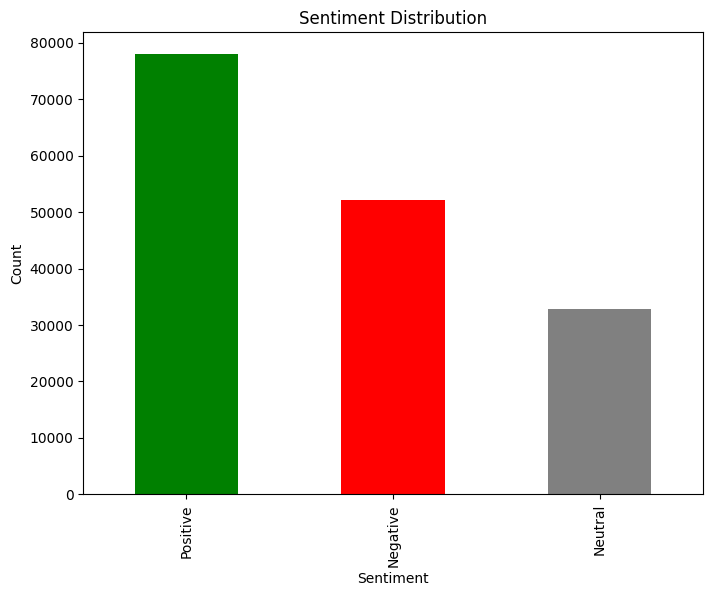

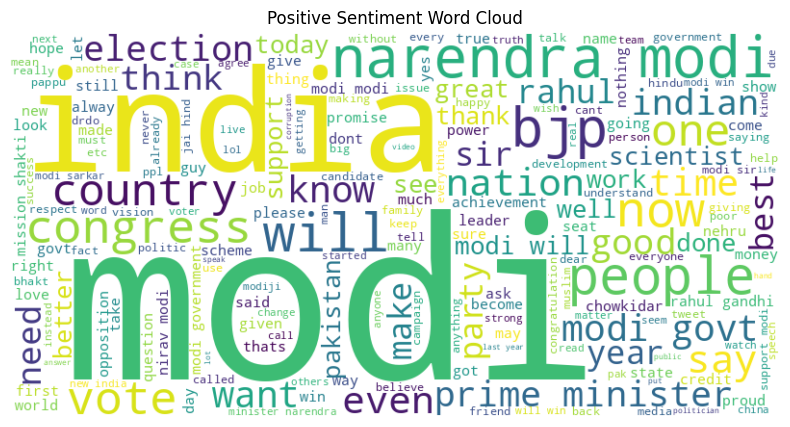


Enter a tweet to analyze (or type 'exit' to quit): The new iPhone update is amazing!
Predicted Sentiment: Positive

Enter a tweet to analyze (or type 'exit' to quit): The customer service was horrible.
Predicted Sentiment: Negative

Enter a tweet to analyze (or type 'exit' to quit): I am using my phone.
Predicted Sentiment: Neutral

Enter a tweet to analyze (or type 'exit' to quit): The new software update is full of bugs! My phone keeps crashing, and it's so frustrating
Predicted Sentiment: Negative

Enter a tweet to analyze (or type 'exit' to quit): The camera quality is out of this world.
Predicted Sentiment: Neutral

Enter a tweet to analyze (or type 'exit' to quit): exit


In [6]:
!pip install vaderSentiment
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load dataset
df = pd.read_csv("Twitter_Data.csv")

# Assuming the column containing the text data is named 'clean_text'
text_column_name = "clean_text"

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

# Apply text cleaning
df["cleaned_text"] = df[text_column_name].astype(str).apply(clean_text)

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to all tweets
df["Sentiment"] = df["cleaned_text"].apply(get_sentiment)

# Display sentiment counts
print(df["Sentiment"].value_counts())

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
df["Sentiment"].value_counts().plot(kind="bar", color=["green", "red", "gray"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Generate Word Cloud for positive tweets
positive_text = " ".join(df[df["Sentiment"] == "Positive"]["cleaned_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
print("\n")
plt.show()

# **Predict sentiment for a user-given tweet**
while True:
    user_text = input("\nEnter a tweet to analyze (or type 'exit' to quit): ")
    if user_text.lower() == "exit":
        break
    cleaned_input = clean_text(user_text)
    sentiment = get_sentiment(cleaned_input)
    print(f"Predicted Sentiment: {sentiment}")
